In [2]:
import pandas as pd

In [2]:
user_action_pd = pd.read_csv('../data/mars_tianchi_user_actions.csv',header=None)

In [3]:
user_action_pd.columns = ['user_id','song_id', 'gmt_create','action_type','ds']

In [7]:
user_action_ds = user_action_pd[user_action_pd.action_type==1].groupby(['user_id','ds'])['action_type'].count()
print 'the num of data: %d'%user_action_pd['user_id'].count()
print 'the num of user %d'%len(user_action_pd['user_id'].unique())

the num of data: 5652232
the num of user 349946


In [8]:
print user_action_ds.head(20)
print 'the num of song: %d'%len(user_action_pd['song_id'].unique())

user_id                           ds      
0000110e00f7c85f550b329dc3d76210  20150530    1
                                  20150613    1
                                  20150614    1
                                  20150616    1
                                  20150617    2
                                  20150619    1
                                  20150623    3
                                  20150624    3
                                  20150626    1
                                  20150627    5
                                  20150628    2
                                  20150630    3
                                  20150701    1
                                  20150703    1
                                  20150704    1
                                  20150731    1
                                  20150806    1
                                  20150818    2
00004931fe12d6f678f67e375b3806e3  20150414    3
                                  20150416   

In [6]:
user_action_pd.head()

,user_id,song_id,gmt_create,action_type,ds
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,1426406400,1,20150315
1,0db66c0dd3993fd3504bb98c3beb15b3,f87ff481d85d2f95335ab602f38a7655,1426417200,1,20150315
2,f8c065dc140ec74c6e44144164e618e3,8a27d9a6c59628c991c154e8d93f412e,1426406400,2,20150315
3,2c6082cf0d68e244f2a10325e8d1b85b,ecea5fe33e6817d09c395f2910479728,1426417200,1,20150315
4,2c6082cf0d68e244f2a10325e8d1b85b,31a3d0420d89c9b121bb55dbdbbeda6b,1426417200,1,20150315


In [ ]:

print 'the num of  artrist: %d' %(len(user_action_pd))

In [7]:
user_action_pd['gmt_create'] = pd.to_datetime(user_action_pd['gmt_create'],unit='s')

In [8]:
user_action_pd.head()

,user_id,song_id,gmt_create,action_type,ds
0,7063b3d0c075a4d276c5f06f4327cf4a,effb071415be51f11e845884e67c0f8c,2015-03-15 08:00:00,1,20150315
1,0db66c0dd3993fd3504bb98c3beb15b3,f87ff481d85d2f95335ab602f38a7655,2015-03-15 11:00:00,1,20150315
2,f8c065dc140ec74c6e44144164e618e3,8a27d9a6c59628c991c154e8d93f412e,2015-03-15 08:00:00,2,20150315
3,2c6082cf0d68e244f2a10325e8d1b85b,ecea5fe33e6817d09c395f2910479728,2015-03-15 11:00:00,1,20150315
4,2c6082cf0d68e244f2a10325e8d1b85b,31a3d0420d89c9b121bb55dbdbbeda6b,2015-03-15 11:00:00,1,20150315


1    4783603
2     812427
3      56202
Name: action_type, dtype: int64


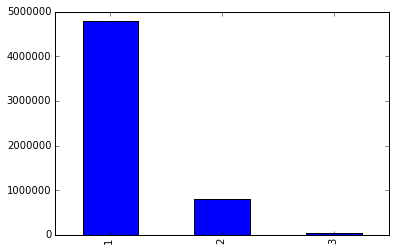

In [9]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
print user_action_pd['action_type'].value_counts()
user_action_pd['action_type'].value_counts().sort_index().plot(kind='bar')

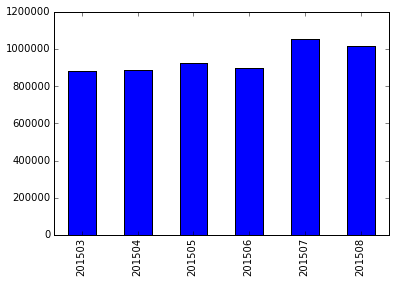

In [10]:
user_action_pd['ds_month'] =  user_action_pd['ds']/100
user_action_pd['ds_month'] = user_action_pd['ds_month'].astype(int)
user_action_pd['ds_month'].value_counts().sort_index().plot(kind='bar')

#按song_id来做分组，得到播放count，下载count，收藏count

In [11]:
user_action_song_pd = user_action_pd.groupby('song_id')['action_type'].value_counts()

In [12]:
user_action_song_pd = user_action_song_pd.reset_index()

In [13]:
user_action_song_pd.head(5)

,song_id,action_type,0
0,00088cb1e6d740fcd42bc8ff2673c805,2,10
1,00088cb1e6d740fcd42bc8ff2673c805,1,8
2,0008de587f84d8c9491502c5a5c8b466,1,337
3,0008de587f84d8c9491502c5a5c8b466,2,76
4,0008de587f84d8c9491502c5a5c8b466,3,2


In [14]:
# 歌曲被听得用户id数
song_user_num_distinct_pd = user_action_pd.groupby('song_id')['user_id'].nunique()
song_user_num_distinct_pd = song_user_num_distinct_pd.reset_index()
print song_user_num_distinct_pd.head(5)
song_user_num_pd = user_action_pd.groupby('song_id')['user_id'].count()
song_user_num_pd = song_user_num_pd.reset_index()
print song_user_num_pd.head(5)
song_user_num_final_pd = song_user_num_distinct_pd.merge(song_user_num_pd,on='song_id')
song_user_num_final_pd.columns=['song_id','user_id_unique','user_id_num']
print song_user_num_final_pd.head(5)
print song_user_num_final_pd.count()

                            song_id  user_id
0  00088cb1e6d740fcd42bc8ff2673c805       14
1  0008de587f84d8c9491502c5a5c8b466      118
2  001255dc583167e23fb7dbae3e326aa1        4
3  0016fea9ce414e9b4c3111560b421fb8        8
4  001b556ab4be161f90c5f3543b01b7e1      133
                            song_id  user_id
0  00088cb1e6d740fcd42bc8ff2673c805       18
1  0008de587f84d8c9491502c5a5c8b466      415
2  001255dc583167e23fb7dbae3e326aa1        4
3  0016fea9ce414e9b4c3111560b421fb8       28
4  001b556ab4be161f90c5f3543b01b7e1      443
                            song_id  user_id_unique  user_id_num
0  00088cb1e6d740fcd42bc8ff2673c805              14           18
1  0008de587f84d8c9491502c5a5c8b466             118          415
2  001255dc583167e23fb7dbae3e326aa1               4            4
3  0016fea9ce414e9b4c3111560b421fb8               8           28
4  001b556ab4be161f90c5f3543b01b7e1             133          443
song_id           10278
user_id_unique    10278
user_id_num       1027

In [3]:
songs_info_pd = pd.read_csv('../data/mars_tianchi_songs.csv', header=None)
songs_info_pd.columns=['song_id','artist_id','publish_time','song_init_plays','Language','Gender']
print songs_info_pd.head(5)

                            song_id                         artist_id  \
0  af0e153c72bf63e21bb42702ef0d7726  0c80008b0a28d356026f4b1097041689   
1  0919b5ed4ce2649f61bcc6c21fadab12  0c80008b0a28d356026f4b1097041689   
2  8a0777df37bf6a0f3384d63a47d4d21b  0c80008b0a28d356026f4b1097041689   
3  b61bc45712ee40c3f4a37dd4d063ad52  0c80008b0a28d356026f4b1097041689   
4  a2fbe29da3a760d7467b8a7b3247a9c8  0c80008b0a28d356026f4b1097041689   

   publish_time  song_init_plays  Language  Gender  
0      20120512            11360         2       1  
1      20121224             2018         2       1  
2      20111206             4825         2       1  
3      20130522             5502         2       1  
4      20130522             2990         2       1  


In [9]:
songs_info_pd['publish_time'] = pd.to_datetime(songs_info_pd['publish_time'].astype(str),unit='D')

songs_info_pd['publish_year'] = pd.DatetimeIndex(songs_info_pd['publish_time']).year

In [19]:
artist_songs_dis = songs_info_pd.groupby(['publish_year'])['song_id'].count()

Populating the interactive namespace from numpy and matplotlib


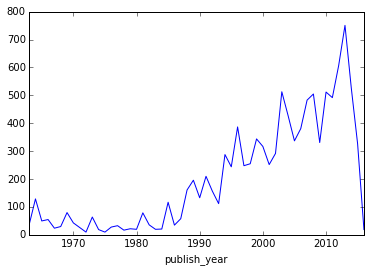

In [21]:
%pylab inline
artist_songs_dis.plot()

In [16]:
songs_info_pd['Language'].value_counts()

2      3102
4      3029
1      1942
11     1500
3       775
100     437
12       28
0        19
14       10
Name: Language, dtype: int64

In [17]:
# songs_info_pd['publish_time'] = pd.to_datetime(songs_info_pd['publish_time'])

In [18]:
songs_info_pd.head(5)

,song_id,artist_id,publish_time,song_init_plays,Language,Gender
0,af0e153c72bf63e21bb42702ef0d7726,0c80008b0a28d356026f4b1097041689,20120512,11360,2,1
1,0919b5ed4ce2649f61bcc6c21fadab12,0c80008b0a28d356026f4b1097041689,20121224,2018,2,1
2,8a0777df37bf6a0f3384d63a47d4d21b,0c80008b0a28d356026f4b1097041689,20111206,4825,2,1
3,b61bc45712ee40c3f4a37dd4d063ad52,0c80008b0a28d356026f4b1097041689,20130522,5502,2,1
4,a2fbe29da3a760d7467b8a7b3247a9c8,0c80008b0a28d356026f4b1097041689,20130522,2990,2,1


In [24]:
songs_info_pd['publish_time'] = pd.to_datetime(songs_info_pd['publish_time'].astype(str),unit='D')

In [25]:
songs_info_pd.head(5)

,song_id,artist_id,publish_time,song_init_plays,Language,Gender,publish_time2
0,af0e153c72bf63e21bb42702ef0d7726,0c80008b0a28d356026f4b1097041689,2012-05-12,11360,2,1,2012-05-12
1,0919b5ed4ce2649f61bcc6c21fadab12,0c80008b0a28d356026f4b1097041689,2012-12-24,2018,2,1,2012-12-24
2,8a0777df37bf6a0f3384d63a47d4d21b,0c80008b0a28d356026f4b1097041689,2011-12-06,4825,2,1,2011-12-06
3,b61bc45712ee40c3f4a37dd4d063ad52,0c80008b0a28d356026f4b1097041689,2013-05-22,5502,2,1,2013-05-22
4,a2fbe29da3a760d7467b8a7b3247a9c8,0c80008b0a28d356026f4b1097041689,2013-05-22,2990,2,1,2013-05-22


In [28]:
songs_info_pd['publish_time_year'] = songs_info_pd['publish_time'].astype(str).split('-')(0)

AttributeError: 'Series' object has no attribute 'split'